<a href="https://colab.research.google.com/github/ToluwaDavid/malaria_DetectionML/blob/master/malariaDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install tensorflow-gpu==2.0.0-rc0

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, ZeroPadding2D, Dropout 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras import optimizers

print(tf.__version__)

2.3.0


In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
!git clone https://github.com/laxmimerit/Malaria-Classification-Using-CNN.git

Cloning into 'Malaria-Classification-Using-CNN'...
remote: Enumerating objects: 27577, done.
remote: Total 27577 (delta 0), reused 0 (delta 0), pack-reused 27577
Receiving objects: 100% (27577/27577), 331.67 MiB | 45.74 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Checking out files: 100% (27562/27562), done.


In [42]:
img_width = 64
img_height = 64

In [43]:
datagen = ImageDataGenerator(rescale=1/255.0 , validation_split= 0.2)

In [51]:
train_data_generator = datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN', 
                                                    target_size = (img_width , img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'training'                                          
                                                   )

Found 22047 images belonging to 2 classes.


In [52]:
validation_data_generator = datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN', 
                                                    target_size = (img_width , img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'validation'                                          
                                                   )

Found 5511 images belonging to 2 classes.


In [53]:
train_data_generator.labels

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

CNN PROPER

In [54]:
model = Sequential()
model.add(Conv2D(16, (3,3), input_shape= (img_width, img_height, 3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))


model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [55]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)             

In [56]:
model.compile(optimizer='adam' , loss='binary_crossentropy', metrics = ['accuracy'])

In [57]:
history = model.fit_generator( generator= train_data_generator,
                              steps_per_epoch = len(train_data_generator),
                              epochs = 5,
                              validation_data = validation_data_generator,
                              validation_steps = len(validation_data_generator))

Epoch 1/5
1378/1378 [==============================] - 80s 58ms/step - loss: 7.0035e-04 - accuracy: 0.9996 - val_loss: 1.1025e-14 - val_accuracy: 1.0000
Epoch 2/5
1378/1378 [==============================] - 80s 58ms/step - loss: 2.1857e-09 - accuracy: 1.0000 - val_loss: 9.0317e-15 - val_accuracy: 1.0000
Epoch 3/5
1378/1378 [==============================] - 82s 60ms/step - loss: 8.3455e-10 - accuracy: 1.0000 - val_loss: 7.8623e-15 - val_accuracy: 1.0000
Epoch 4/5
1378/1378 [==============================] - 89s 64ms/step - loss: 6.8064e-09 - accuracy: 1.0000 - val_loss: 9.0396e-16 - val_accuracy: 1.0000
Epoch 5/5
1378/1378 [==============================] - 90s 66ms/step - loss: 8.1443e-10 - accuracy: 1.0000 - val_loss: 6.4047e-16 - val_accuracy: 1.0000


In [58]:
history.history

{'accuracy': [0.9995917677879333, 1.0, 1.0, 1.0, 1.0],
 'loss': [0.0007003538776189089,
  2.185745806571049e-09,
  8.345459323599869e-10,
  6.806432306660781e-09,
  8.144291907541401e-10],
 'val_accuracy': [1.0, 1.0, 1.0, 1.0, 1.0],
 'val_loss': [1.1025359465189396e-14,
  9.031667524050848e-15,
  7.862258072236297e-15,
  9.039564200459863e-16,
  6.404699340831503e-16]}

In [61]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'val'] , loc='upper left')
  plt.show()

  #plot training % validation loss curve
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range , history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train' , 'Val'], loc='Upper left')
  plt.show()

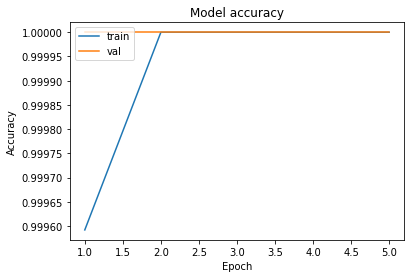

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Unrecognized location 'Upper left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


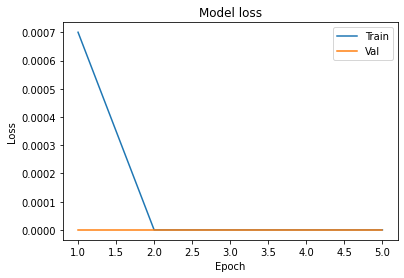

In [62]:
plot_learningCurve(history, 5)